In [1]:
import numpy as np 
import xarray as xr
import pandas as pd
import pickle
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
## import self defined functions
from sys import path 
# insert at 1, 0 is the script path (or '' in REPL)
path.insert(1, '/tigress/cw55/local/python_lib')
from cg_funcs import global_mean_xarray 

In [2]:
plt.rcParams['font.size'] = '6'

# import data

## nn_ratio

In [3]:
# year_list, nn_ratio = pickle.load(open("nn_ratio.train_bad_init_test_10year.2305040839.p","rb"))
# year_list, nn_ratio = pickle.load(open("nn_ratio.train_bad_init_test_10year.2305051005.p","rb"))
# year_list, nn_ratio = pickle.load(open("nn_ratio.train_good_init.2305241552.p","rb"))
year_list, nn_ratio = pickle.load(open("nn_ratio.train_good_init.2306091059.p","rb"))
 
tile_name = ['Atlantic', 'Indian','Arctic', 'Pacific', 'America', 'Antarctic']

In [4]:
year_list

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004])

## ts_gm & ENSO

In [5]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/'
dssst = xr.open_dataset(file_path+'/INPUT/hadisst_sst.data.nc').sst.sel(lat=slice(-60,60))  
dssst_clm = xr.open_dataset('./hadisst_sst_ctl.data.nc').sst.sel(lat=slice(-60,60))   
gm1 = global_mean_xarray(dssst.groupby('time.year').mean('time'))
gm2 = global_mean_xarray(dssst_clm.mean('time'))
ts_anom = dssst.groupby('time.month') - dssst_clm.groupby('time.month').mean('time')
gmst_anom = global_mean_xarray(ts_anom).sel(time=slice(str(year_list[0]),str(year_list[-1])))

In [6]:
nino34 = ts_anom.sel(time=slice(str(year_list[0]),str(year_list[-1])))\
.sel(lon = slice(190,240)).sel(lat = slice(-5,5)).mean(['lat','lon']).rolling(time=12,center=True).mean() 

# plot

In [7]:
gmst_anom_y = gmst_anom.groupby('time.year').mean()
ytime = gmst_anom.time[::12] 
mtime = gmst_anom.time

## statistics on 6 tiles

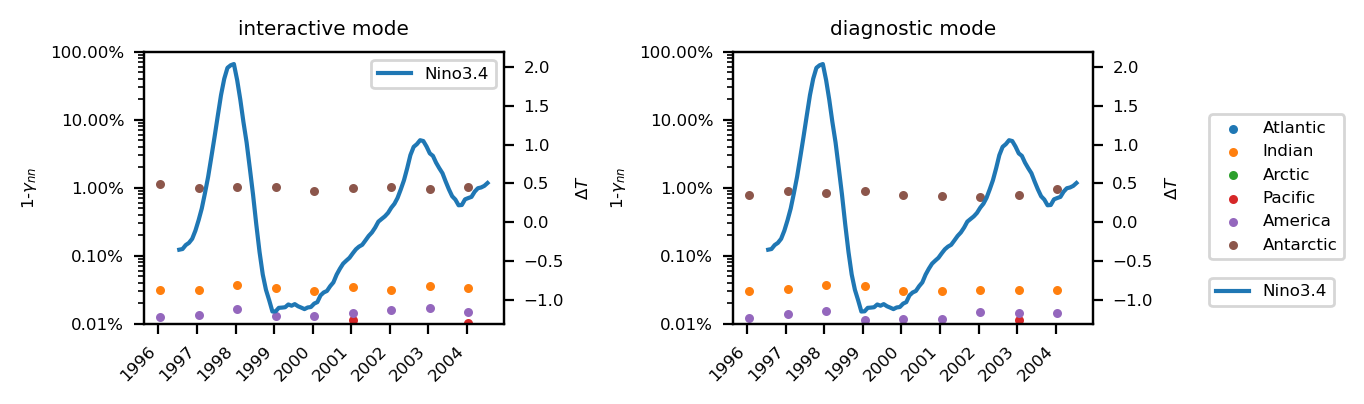

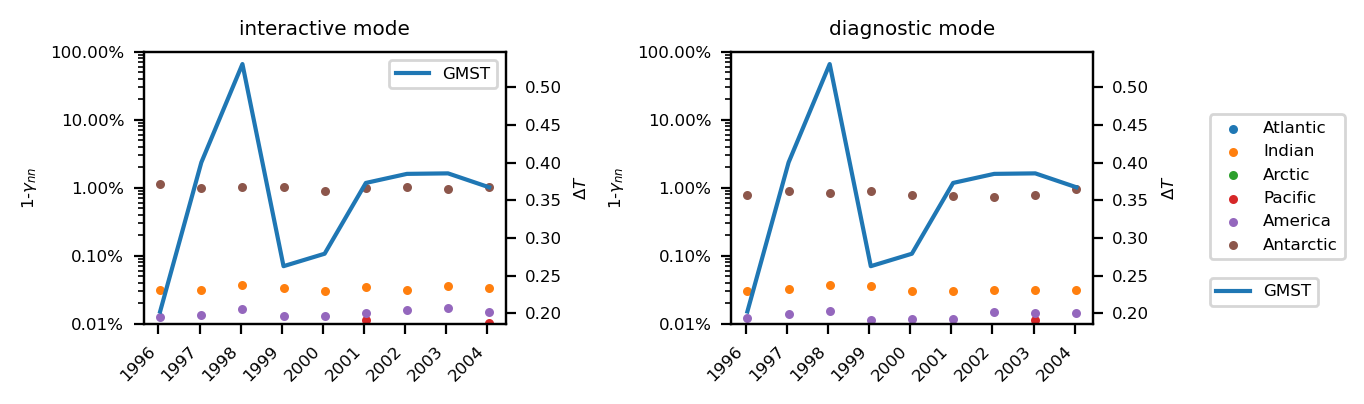

In [36]:
for iplot in range(2):
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(7,2),dpi=200)
    for ti in range(6): 
        axs[0].scatter(ytime,nn_ratio[0,ti,:].reshape(-1,12).mean(axis=1),label=tile_name[ti],s=5)
        axs[1].scatter(ytime,nn_ratio[1,ti,:].reshape(-1,12).mean(axis=1),label=tile_name[ti],s=5)

    for ax in axs:
        ax2 = ax.twinx()
        if iplot==0:
            ax2.plot(mtime,nino34, label = 'Nino3.4')
        else:
            ax2.plot(ytime,gmst_anom_y, label = 'GMST')  
        ax2.legend() 
        ax2.set_ylabel('$\Delta T$')
        ax.set_ylabel('1-$\gamma_{nn}$')
        ax.set_yscale('log') 
        ax.set_ylim([0.01,100])  
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
    ax.legend(loc='upper left', bbox_to_anchor=(1.3, 0.8))
    ax2.legend(loc='upper left', bbox_to_anchor=(1.3, 0.2))
    axs[0].set_title('interactive mode')
    axs[1].set_title('diagnostic mode')
    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()  

## statistics on regrid latlon

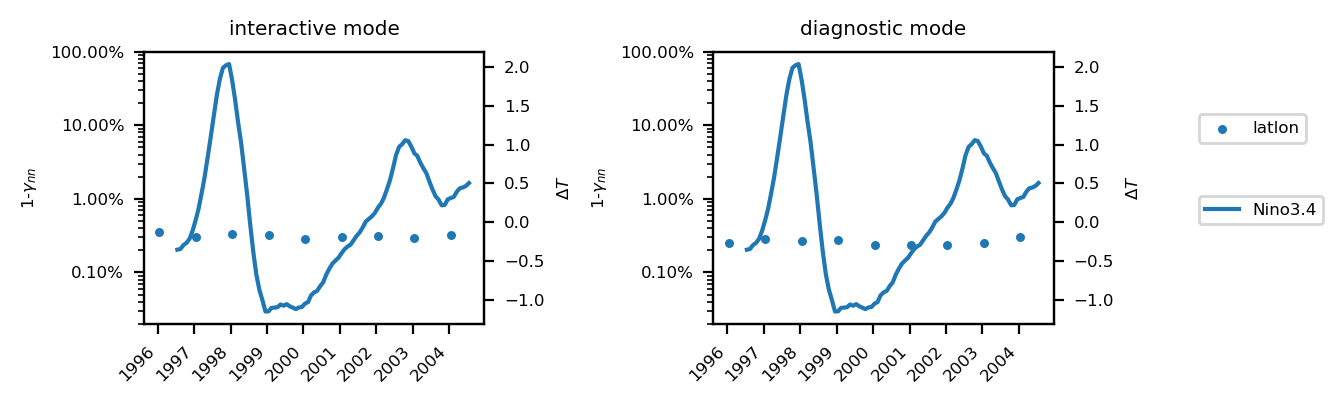

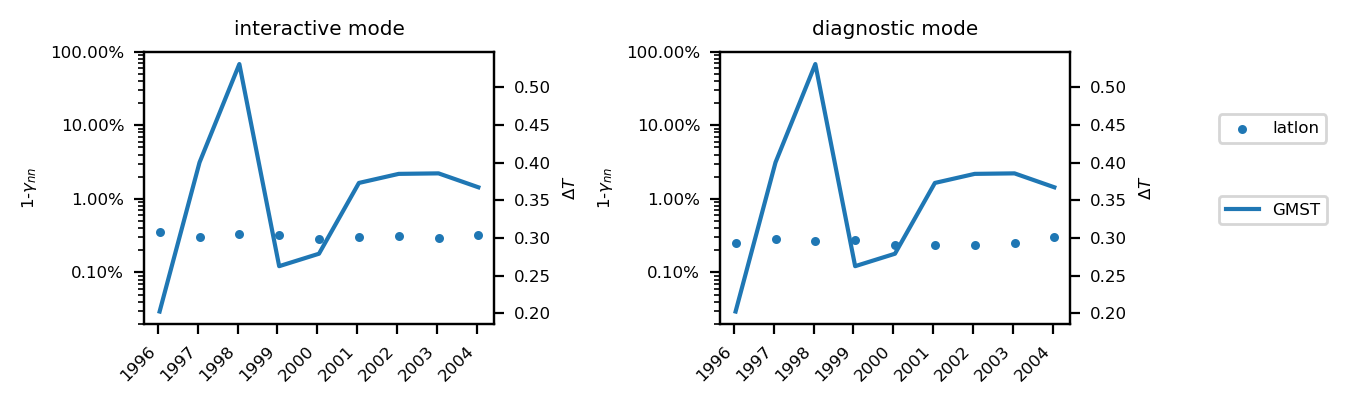

In [37]:
for iplot in range(2):
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(7,2),dpi=200) 
    axs[0].scatter(ytime,nn_ratio[0,:,:].mean(axis=0).reshape(-1,12).mean(axis=1),s=5,label='latlon')
    axs[1].scatter(ytime,nn_ratio[1,:,:].mean(axis=0).reshape(-1,12).mean(axis=1),s=5,label='latlon')

    for ax in axs:
        ax2 = ax.twinx()
        if iplot==0:
            ax2.plot(mtime,nino34, label = 'Nino3.4')
        else:
            ax2.plot(ytime,gmst_anom_y, label = 'GMST')   
        ax2.set_ylabel('$\Delta T$')
        ax.set_yscale('log') 
        ax.set_ylabel('1-$\gamma_{nn}$')
        ax.set_ylim([0.02,100])  
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2)) 
    ax.legend(loc='upper left', bbox_to_anchor=(1.4, 0.8))
    ax2.legend(loc='upper left', bbox_to_anchor=(1.4, 0.5))
    axs[0].set_title('interactive mode')
    axs[1].set_title('diagnostic mode')
    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()  

## monthly results

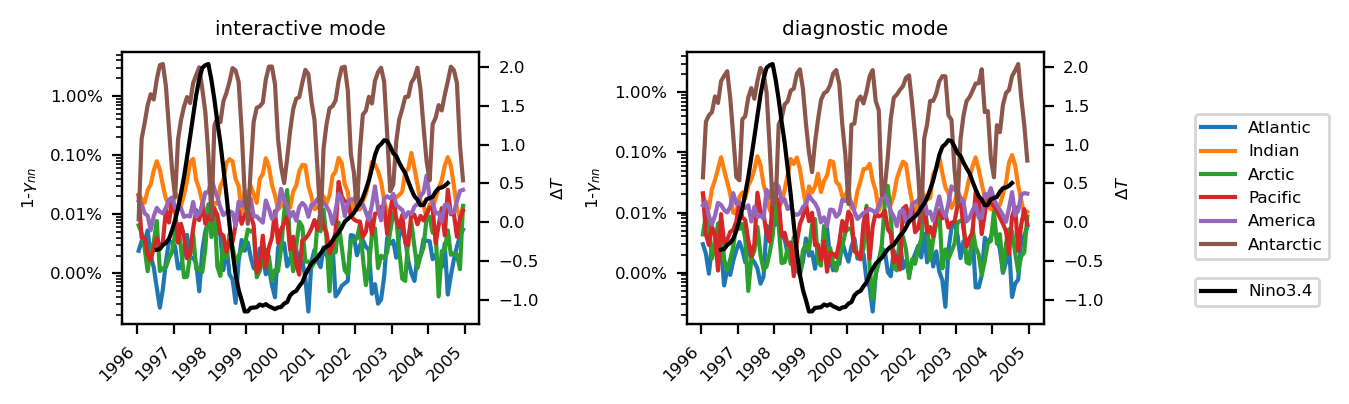

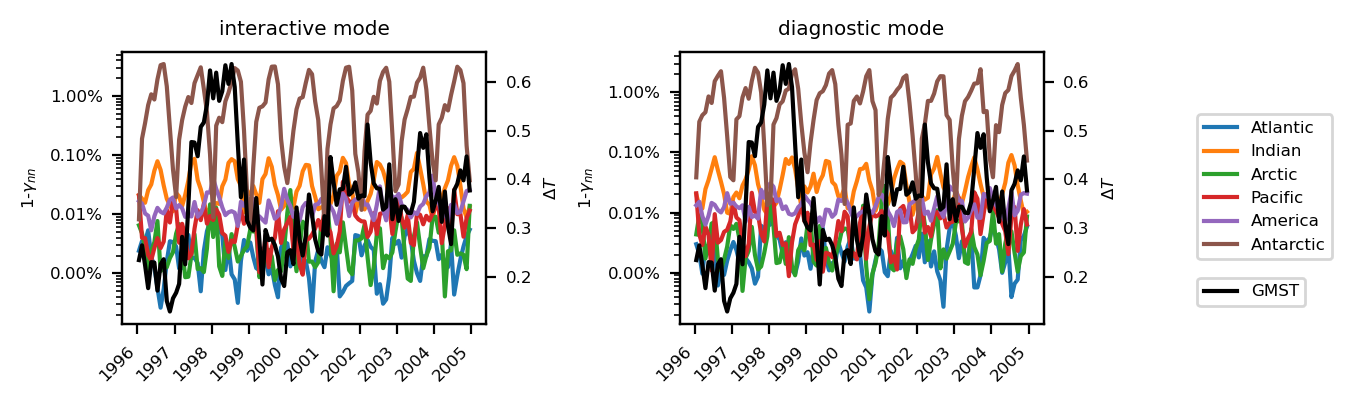

In [38]:
for iplot in range(2):

    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(7,2),dpi=200)
    for ti in range(6):
        # axs[0].scatter(mtime,nn_ratio[0,ti,:],label=tile_name[ti],s=5)
        # axs[1].scatter(mtime,nn_ratio[1,ti,:],label=tile_name[ti],s=5) 
        axs[0].plot(mtime,nn_ratio[0,ti,:],label=tile_name[ti])
        axs[1].plot(mtime,nn_ratio[1,ti,:],label=tile_name[ti]) 
    for ax in axs: 
        ax2 = ax.twinx()
        if iplot==0:
            ax2.plot(mtime,nino34, label = 'Nino3.4',c='black')
        else:
            ax2.plot(mtime,gmst_anom, label = 'GMST',c='black')  
        ax2.set_ylabel('$\Delta T$')
        ax.set_yscale('log') 
        ax.set_ylabel('1-$\gamma_{nn}$')
        # ax.set_ylim([0.02,100])   
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
    ax.legend(loc='upper left', bbox_to_anchor=(1.4, 0.8))
    ax2.legend(loc='upper left', bbox_to_anchor=(1.4, 0.2))
    axs[0].set_title('interactive mode')
    axs[1].set_title('diagnostic mode')
    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()  

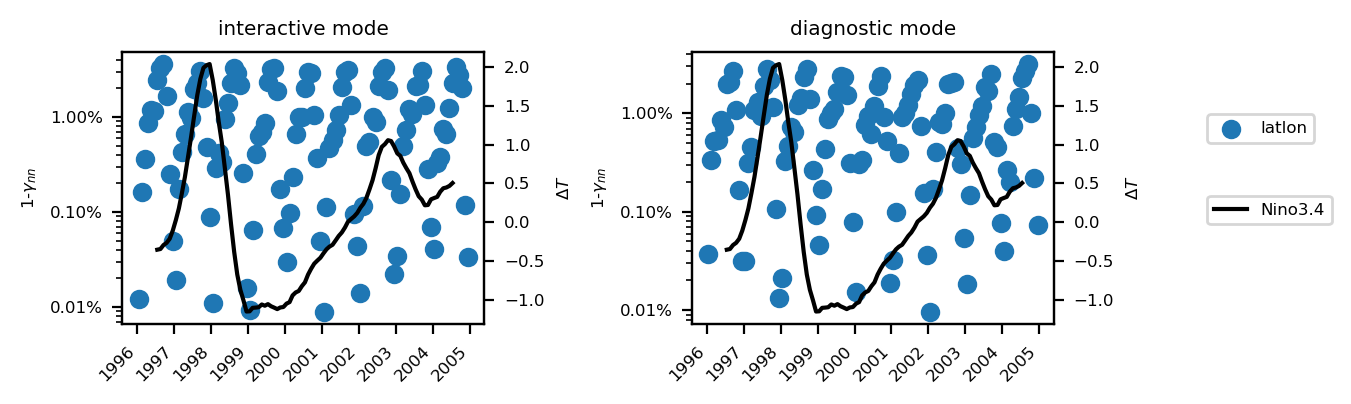

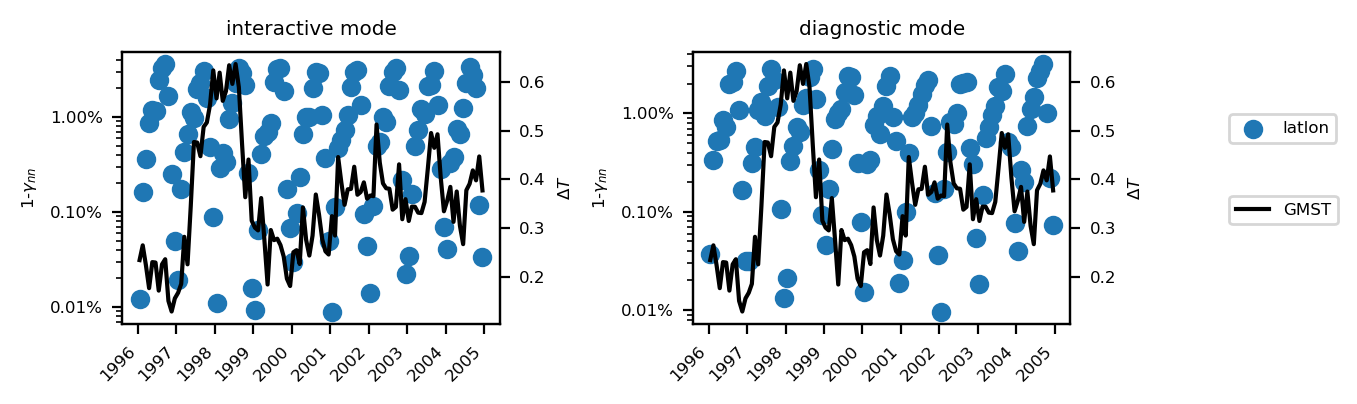

In [39]:
for iplot in range(2):

    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(7,2),dpi=200)
    axs[0].scatter(mtime,nn_ratio[0,6,:],label='latlon')
    axs[1].scatter(mtime,nn_ratio[1,6,:],label='latlon')
    for ax in axs: 
        ax2 = ax.twinx()
        if iplot==0:
            ax2.plot(mtime,nino34, label = 'Nino3.4',c='black')
        else:
            ax2.plot(mtime,gmst_anom, label = 'GMST',c='black')   
        ax2.set_ylabel('$\Delta T$')
        ax.set_yscale('log') 
        ax.set_ylabel('1-$\gamma_{nn}$')
        # ax.set_ylim([0.02,100])  
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
    ax.legend(loc='upper left', bbox_to_anchor=(1.4, 0.8))
    ax2.legend(loc='upper left', bbox_to_anchor=(1.4, 0.5))
    axs[0].set_title('interactive mode')
    axs[1].set_title('diagnostic mode')
    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()  